# SVR / Destek Vektör Regresyonu
Amaç bir marjin aralığına maksimum noktayı minumum hata ile alabilecek şekilde doğru yada eğriyi belirlemektir

Hocam belirli bir epsilon edğeri var. Gözlemlerden doğru etrafında bu epsilon kadarlık yakınlarda duranlarla alakalı sıkıntı yaşanmıyor
Bu epsilon değerini aşanlarıda kıssi denilen yenş bir ölçek içerisinde tutmaya çalışıypr işte tüm gözlemleri kendi etrafında 
bu aralıklarda tutabilecek olan doğru/eğri oluşturuluyor.
Takdir edersin ki bu ddoğrudaki değişikliği asıl etkileyecek olan epsilon değerini aşan gözlemlerdir

robas regresyon:
Aykırılıklara karşı daha dayanıklı regresyon türleridir. SVR da robas regresyon türünden sayılır


 

# Model

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.svm import SVR

In [65]:
hit=pd.read_csv("Hitters.csv")
df=hit.copy()
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Doğrusal SVR

In [24]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [25]:
svr=SVR(kernel="linear").fit(X_train,y_train)

In [26]:
svr.predict(X_train)[:10]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756, 666.91219512, 150.08292683, 304.13780488,
       507.88780488, 815.99756098])

In [27]:
print("y = {} + x * {}".format(svr.intercept_[0],svr.coef_[0][0]))

y = -48.69756097561513 + x * 4.969512195122093


In [28]:
#bu şekşlde katsayıalrı çekerek formulumuzu oluşturabilriz. Görüldüğü üzere linear SVR simple linear regresyon gibi oldu

In [29]:
#mesela ilk tahmine bakalım
svr.predict(X_train)[0:1]

array([403.52804878])

In [30]:
#ilk xdeğer,nede bakalım 
#ve daha sonra denklemde yerine yazıp deneyelim
X_train[0:1]

,Hits
183,91.0


In [31]:
svr.intercept_[0] + 91 * svr.coef_[0][0] #evet tuttu tahmin denklemi gerçekten buymuş 

403.5280487804953

# geometric gösterim

In [32]:
y_pred=svr.predict(X_train)

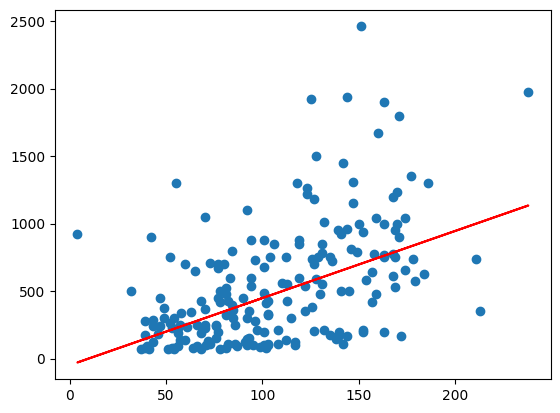

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color="r")

In [34]:
# Soru Peki biz direkt simple linear model kursaydık ne olurdu

In [35]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression().fit(X_train,y_train)
lm_pred=lm.predict(X_train)
print("{} + {} * x".format(lm.intercept_,lm.coef_[0]))


-8.814095480334572 + 5.1724561354706875 * x


In [36]:
# x değerini yerine koyarsak
lm.intercept_+ X_train["Hits"][0:1]*lm.coef_[0]

/var/folders/09/145085653lg5n_gp0jh5fh240000gn/T/ipykernel_1074/2587800617.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  lm.intercept_+ X_train["Hits"][0:1]*lm.coef_[0]


183    461.879413
Name: Hits, dtype: float64

In [37]:
# sonuç 461 çıktı svr modelde ise sonucu 403 bulmuştuk farkın nedeni ne?
# hadi farkı daha net gözlemlemek için görsellerştirelim

Text(0, 0.5, 'maaş (salary)')

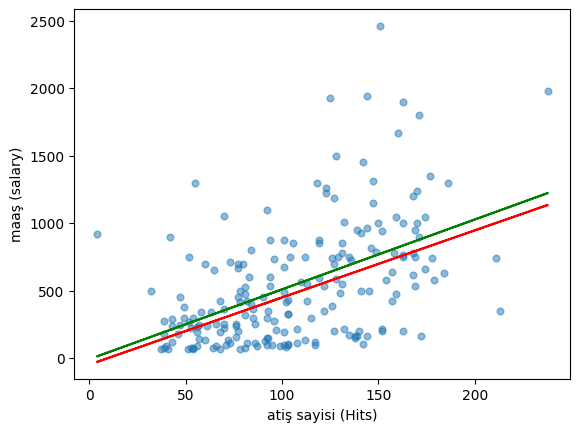

In [38]:
plt.scatter(X_train,y_train,alpha=0.5, s=23)
plt.plot(X_train,lm_pred,"g")
plt.plot(X_train,y_pred,color="r")

plt.xlabel("atiş sayisi (Hits)")
plt.ylabel("maaş (salary)")

In [39]:
#görüldüğü üzere yeşil yani linear regresyonun doğrusu daha yukarıda bunu nedeni 
#yukarıdaki ayrık gözlmeler bu ayrık gözlemlere simple linear reg. daha duyarlı olduğu için 
#doğru etkilenşr ama svr daha dayanıklıdır bunlara karşı

# Tahmin

In [48]:
print("y = {} + x * {} ".format(svr.intercept_[0],svr.coef_[0][0]))
#zaten bu şekilde denkelmi elde etmiştik
#sonra tek değeri yazıp predict sonucu ile karşılaştırmıştık yine yapalım. 
svr.predict([[91]]) #tek değer tahmini

y = -48.69756097561513 + x * 4.969512195122093 


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([403.52804878])

In [49]:
y_pred=svr.predict(X_test)

In [50]:
#hata değeri
np.sqrt(mean_squared_error(y_pred,y_test))

459.0187960365147

# Tuning

In [54]:
#burada tuning etmemiz gereken değer c ceza karmaşılklık paremetresi

In [66]:
svr_params={"C":np.arange(0.1,2,0.1)}
svr_CV_model=GridSearchCV(svr,svr_params,cv=10).fit(X_train, y_train)

In [67]:
svr_CV_model.best_params_

{'C': 0.4}

In [68]:
svr_tuned_model=SVR(kernel="linear",C=svr_CV_model.best_params_["C"]).fit(X_train,y_train)

In [63]:
np.sqrt(mean_squared_error(y_test,svr_tuned_model.predict(X_test)))

458.198966781116

In [71]:
np.sqrt(mean_squared_error(y_test,svr_tuned_model.predict(X_test)))
#yukarıdaki ilk çalıştırmanın bu ikinxüzüci çalıştırmanın sonucu
#ilk çalıştırmada değişkenlerden sadece Hits i aldık ikinxüci tüm data set üzreinden aramayı yaptık
#ve hata öiktarı ciddi şekilde süştü

367.538528365296

# Non-Linear SVR

In [73]:
svr_rbf=SVR(kernel="rbf").fit(X_train,y_train)

In [77]:
np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test)))#ilkel test hatası

460.0032657244849

In [83]:
params={"C":[0.1,0.4,10,20,30,40,50]}
svr_cv=GridSearchCV(svr_rbf,params,cv=10).fit(X_train,y_train)
svr_tuned=SVR(kernel="rbf",C=(pd.Series(svr_cv.best_params_)[0])).fit(X_train,y_train)

In [84]:
np.sqrt(mean_squared_error(y_test,svr_tuned.predict(X_test)))

428.00406888095694